In [1]:
# como mi dataframe tiene un mayor numero de columnas que las predetermiadas por sketch, vamos a aumnmetarle el nuemro de columnas:

import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sketch
from shapely.geometry import Point
import time


# Configurar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)





In [7]:

# Establece la variable de entorno SKETCH_MAX_COLUMNS a un valor mayor
os.environ["SKETCH_MAX_COLUMNS"] = "30"  # Puedes ajustar este valor según tus necesidades

PREGUNTAS PARA EL EDA:
¿Cuál es la dirección IP de origen más común en el marco de datos?<BR>
¿Cuál es la longitud promedio del paquete para cada tipo de protocolo?<BR>
¿Cuál es el tipo de ataque más común en el marco de datos?<BR>
¿Cuál es la distribución de los niveles de gravedad en diferentes tipos de tráfico?<br>
¿Cuál es la información de usuario más común en el marco de datos?<br>
¿Cuál es la puntuación de anomalía promedio para cada firma de ataque?<br>
¿Cuál es la acción más común tomada para cada tipo de ataque?<br>
¿Cuál es la distribución de tipos de paquetes en diferentes segmentos de red?<br>
¿Cuál es la longitud promedio del paquete para cada dato de geo-localización?<br>
¿Cuál es la fuente de registro de firewall más común en el marco de datos?<br>

In [8]:
import pandas as pd

dfp = pd.read_table("cyber.csv", delimiter=',')
dfp

FileNotFoundError: [Errno 2] No such file or directory: 'cyber.csv'

1. **¿Cuál es la dirección IP de origen más común en el marco de datos?**

In [ ]:
# Obtener la dirección IP de origen más común en el marco de datos
ip_mas_comun = dfp['Source IP Address'].mode()[0]

# imprime
print('La dirección IP de origen más común es:', ip_mas_comun)


La dirección IP de origen más común es: 1.1.45.194


In [ ]:
# la ip consultada en la web publica IP2location:
##Nos aporta gran informacion que es guardada en un dict

dict_ip_origen_mas_usada = {  
    "ip": "1.1.45.194",
    "country_code": "CH",
    "country_name": "China",
    "region_name": "Guangdong",
    "city_name": "Guangzhou",
    "life_expectancy": 71.4,  
    "Avg_income": 769,  
    "Continent": "Asia",
    "Population": 1277558000,
    "Surface area": "9.572.900 km sq",
    "Demographic data": True,
    "latitude": 23.127361,
    "longitude": 113.26457,
    "zip_code": "510140",
    "time_zone": "+08:00",
    "asn": "-",
    "as": "-",
    "isp": "ChinaNet Guangdong Province Network",
    "domain": "chinatelecom.com.cn",
    "net_speed": "DSL",
    "idd_code": 86,
    "area_code": 20,
    "weather_station_code": "CHXX0037",
    "weather_station_name": "Guangzhou",
    "mcc": 460,
    "mnc": "03/11",
    "mobile_brand": "China Telecom",
    "elevation": 11,
    "usage_type": "ISP/MOB",
    "address_type": "Unicast",
    "continent": {},
    "district": "Yue Xiu Qu",
    "country": {},
    "region": {},
    "city": {},
    "time_zone_info": {},
    "geotargeting": {},
    "ads_category": "IAB19-18",
    "ads_category_name": "Internet Technology",
    "is_proxy": False,
    "proxy": {}
}


*** de 3 columnas nuevas por tipo de ataque, nivel de gravedad y accion tomada por cada direccion de ip**

In [ ]:
# Crear una nueva columna para almacenar el tipo de ataque para cada dirección IP (Attack_Type)
dfp['Attack_Type'] = np.where(dfp['Source IP Address'] == '1.1.45.194', 'Most Common Attack', dfp['Attack Type'])
#Utiliza la función np.where para asignar el valor 'Most Common Attack' a la columna 'Attack_Type' cuando la dirección IP sea '1.1.45.194', 
# y de lo contrario, utiliza los valores existentes en la columna 'Attack Type'.

# Crear una nueva columna para almacenar el nivel de gravedad para cada dirección IP (Severity_Level)
dfp['Severity_Level'] = np.where(dfp['Source IP Address'] == '1.1.45.194', 'High', dfp['Severity Level'])
#Utiliza la función np.where para asignar el valor 'High' a la columna 'Severity_Level' 
# cuando la dirección IP sea '1.1.45.194', y de lo contrario, # utiliza los valores existentes en la columna 'Severity Level'.

# Crear una nueva columna para almacenar la acción tomada para cada dirección IP 
dfp['Action_Taken'] = np.where(dfp['Source IP Address'] == '1.1.45.194', 'Blocked', dfp['Action Taken'])
# Utiliza la función np.where para asignar el valor 'Blocked' a la columna 'Action_Taken' cuando la dirección IP sea '1.1.45.194',
#  y de lo contrario, utiliza los valores existentes en la columna 'Action Taken'.

In [ ]:
df_data = pd.read_csv("E:\Cursos\BC_Data_Science\Repositorio\proyecto EDA\data_ip_pais.csv")


In [ ]:
dfp.sketch.howto(" What protocol has been the most used in the different types of pfd attacks?")

**crero 2 columnas por pais de origen de ataque por ip y ciudad de origen**

In [ ]:
# Crear una nueva columna para almacenar el país de origen para cada dirección IP (Country_Origin)
dfp['Country_Origin'] = dfp['Geo-location Data'].str.split(',').str[1]
#Utiliza la columna 'Geo-location Data' y aplica la función str.split(',') para dividir la cadena en una lista usando la coma como delimitador.
#Luego, utiliza str[1] para seleccionar el segundo elemento de la lista resultante, que debería ser el país de origen.
# Create a new column for the city of origin

#Crear una nueva columna para la ciudad de origen (City_Origin)
dfp['City_Origin'] = dfp['Geo-location Data'].str.split(',').str[0]
#silimiar al anteriorm pero Utiliza str[0] para seleccionar el primer elemento de la lista resultante, que debería ser la ciudad de origen.


# Agrupar el DataFrame por múltiples columnas (grouped_df)
grouped_dfp = dfp.groupby(['Country_Origin', 'City_Origin', 'Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port', 'Protocol'])
#Utiliza el método groupby para agrupar el DataFrame por las columnas 'Country_Origin', 'City_Origin', 'Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port', y 'Protocol'.
#Este paso crea un objeto de tipo DataFrameGroupBy, que puedes usar para realizar operaciones agregadas en los grupos, como contar, sumar, etc.

In [ ]:
dfp

Timestamp Source IP Address Destination IP Address  \
0      2023-05-30 06:33:58     103.216.15.12           84.9.164.252   
1      2020-08-26 07:08:30    78.199.217.198         66.191.137.154   
2      2022-11-13 08:23:25      63.79.210.48          198.219.82.17   
3      2023-07-02 10:38:46     163.42.196.10        101.228.192.255   
4      2023-07-16 13:11:07     71.166.185.76        189.243.174.238   
...                    ...               ...                    ...   
39995  2023-05-26 14:08:42      26.36.109.26         121.100.75.240   
39996  2023-03-27 00:38:27      17.21.163.81         196.108.134.78   
39997  2022-03-31 01:45:49     162.35.217.57            98.107.0.15   
39998  2023-09-22 18:32:38    208.72.233.205         173.79.112.252   
39999  2023-10-10 11:59:52     14.102.21.108           109.198.45.7   

       Source Port  Destination Port Protocol  Packet Length Packet Type  \
0            31225             17616     ICMP            503        Data   
1            17245             48166     ICMP           1174        Data   
2            16811             53600      UDP            306     Control   
3            20018             32534      UDP            385        Data   
4             6131             26646      TCP           1462        Data   
...            ...               ...      ...            ...         ...   
39995        31005              6764      UDP           1428     Control   
39996         2553             28091      UDP           1184     Control   
39997        22505             25152      UDP           1043        Data   
39998        20013              2703      UDP            483        Data   
39999        50137             55575     ICMP           1175     Control   

      Traffic Type                                       Payload Data  ...  \
0             HTTP  Qui natus odio asperiores nam. Optio nobis ius...  ...   
1             HTTP  Aperiam quos modi officiis veritatis rem. Omni...  ...   
2             HTTP  Perferendis sapiente vitae soluta. Hic delectu...  ...   
3             HTTP  Totam maxime beatae expedita explicabo porro l...  ...   
4              DNS  Odit nesciunt dolorem nisi iste iusto. Animi v...  ...   
...            ...                                                ...  ...   
39995         HTTP  Quibusdam ullam consequatur consequuntur accus...  ...   
39996         HTTP  Quaerat neque esse. Animi expedita natus commo...  ...   
39997          DNS  Enim at aspernatur illum. Saepe numquam eligen...  ...   
39998          FTP  Officiis dolorem sed harum provident earum dis...  ...   
39999         HTTP  Eligendi omnis voluptate nihil voluptatibus do...  ...   

      Network Segment  Proxy Information Firewall Logs IDS/IPS Alerts  \
0           Segment A       150.9.97.135      Log Data            NaN   
1           Segment B                NaN      Log Data            NaN   
2           Segment C     114.133.48.179      Log Data     Alert Data   
3           Segment B                NaN           NaN     Alert Data   
4           Segment C      149.6.110.119           NaN     Alert Data   
...               ...                ...           ...            ...   
39995       Segment A                NaN      Log Data     Alert Data   
39996       Segment C        60.51.30.46      Log Data            NaN   
39997       Segment C                NaN      Log Data     Alert Data   
39998       Segment B       137.76.130.8      Log Data            NaN   
39999       Segment A    112.169.115.139      Log Data     Alert Data   

      Log Source Attack_Type Severity_Level Action_Taken      Country_Origin  \
0         Server     Malware            Low       Logged              Sikkim   
1       Firewall     Malware            Low      Blocked            Nagaland   
2       Firewall        DDoS            Low      Ignored           Rajasthan   
3       Firewall     Malware         Medium      Blocked           Rajasthan   
4       Firewall        DDoS         

In [ ]:
dfp["Payload Data"]



0                                            Qui natus odio asperiores nam. Optio nobis iusto accusamus ad perferendis esse at. Asperiores neque at ad.\nMaiores possimus ipsum saepe vitae. Ad possimus veritatis.
1             Aperiam quos modi officiis veritatis rem. Omnis nulla dolore perspiciatis.\nIllo animi mollitia vero voluptates error ad. Quidem maxime eaque optio a. Consectetur quasi veniam et totam culpa ullam.
2                                                                                                                                      Perferendis sapiente vitae soluta. Hic delectus quae nemo ea esse est rerum.
3                 Totam maxime beatae expedita explicabo porro labore. Minima ab fugit officiis dicta perspiciatis pariatur. Facilis voluptates eligendi dolores eveniet deserunt. Eveniet reprehenderit culpa quo.
4                        Odit nesciunt dolorem nisi iste iusto. Animi voluptates soluta quis doloribus quas. Iure harum nihil hic illo repellendus.\nQui

. **##Que protocolo ha sido el mas usado en los ataques**

In [ ]:
##Que protocolo ha sido el mas usado en los ataques

# Crear un nuevo DataFrame para almacenar el recuento de cada protocolo utilizado en los diferentes tipos de ataques PFD
numero_protocolos = dfp.groupby(['Attack_Type', 'Protocol'])['Protocol'].count().reset_index(name='count')

# Encontrar el índice del máximo recuento para cada tipo de ataque
idx_max_count = numero_protocolos.groupby('Attack_Type')['count'].idxmax()

# Filtrar el DataFrame original con los índices encontrados
protocolo_mas_usado_diferente_ataque = numero_protocolos.loc[idx_max_count]

# Imprimir el protocolo más utilizado para cada tipo de ataque:
print(protocolo_mas_usado_diferente_ataque[['Attack_Type', 'Protocol']])

          Attack_Type Protocol
0                DDoS     ICMP
3           Intrusion     ICMP
6             Malware     ICMP
9  Most Common Attack     ICMP


ICMP(Protocolo de Mensajes de Control de Internet),  es un protocolo esencial para el funcionamiento y la administración de redes, proporcionando información crucial sobre la conectividad y el estado de los dispositivos en la red, aunque en realidad  esta diseñado parra enviar mensajes de control y error relacionado socn la operacion de la red ( el uso mas tipico es la realizacion de un "ping"), haya ataques que se producen por este protocolo y en nuestro dataset es el mas usado:<br>

            1.-Ping Flood (Nivel de Dificultad: Bajo):
                -*Descripción:* En un ataque de ping flood, un atacante envía un gran número de solicitudes de eco ICMP (ping) a un objetivo con el objetivo de saturar su capacidad de respuesta.<br>
                -*Dificultad:* Dificultad: Bajo. Herramientas automatizadas, como herramientas de inundación de ping, están fácilmente disponibles en línea.<br>
            2.-**Ping of Death (Nivel de Dificultad: Bajo):**<br>
                -*Descripcion*:Este ataque implica enviar un paquete ICMP malformado, superando los límites normales del tamaño del paquete, lo que puede causar un bloqueo o mal funcionamiento en el destino.<br>
                -*Disficultad*:Bajo. Sin embargo, la efectividad de este ataque ha disminuido significativamente debido a las protecciones implementadas en sistemas modernos.<br>
            3.- **Ataque de Redirección ICMP (Nivel de Dificultad: Moderado):**<br>
                -*Descripcion*:Un atacante manipula mensajes ICMP de redirección para dirigir el tráfico a través de una ruta comprometida.<br>
                -*Dificultad*:Moderado. Requiere un conocimiento más avanzado de las redes y la capacidad para manipular los mensajes ICMP.<br>
            4.-**Ataque de Denegación de Servicio (DoS) mediante ICMP (Nivel de Dificultad: Moderado a Alto):**<br>
                -*Descripcion*:Utiliza mensajes ICMP maliciosos para inundar el sistema o la red, afectando la disponibilidad de los servicios.<br>
                -*Dificultad*: Moderado a Alto. La complejidad aumenta según la sofisticación del ataque y las contramedidas implementadas.<br>
            
            
La dificultad percibida puede variar según la infraestructura objetivo y las medidas de seguridad implementadas, ya que la mayoría de los ataques ICMP han sido mitigados en gran medida mediante el uso de firewalls, sistemas de detección de intrusiones y otras medidas de seguridad, no obstante en nuestro dataset es el protocolo mas usado para realziar los ataques.          

2. **¿Cuál es la longitud promedio del paquete para cada tipo de protocolo?**

In [ ]:

# Calcular la longitud promedio de paquete para cada tipo de protocolo
dfp.groupby('Protocol')['Packet Length'].mean()

Protocol
ICMP    785.022414
TCP     777.912297
UDP     781.381382
Name: Packet Length, dtype: float64

In [ ]:
#  df_y.sketch.ask("What are the max values of each numerical column")
#  df_y.sketch.howto("How can you get information What is the most common attack type in the dataframe?.")

3.** ¿Cuál es el tipo de ataque más común en el marco de datos**

In [ ]:
### 3 - ¿Cuál es el tipo de ataque más común en el marco de datos

#Obtener la columna de tipo de ataquee
attack_type_col = dfp['Attack Type']

# Obtener el tipo de ataque más común
tipo_ataque_mas_comune = attack_type_col.mode()[0]

print('El tipo_ataque_mas_comun es:', tipo_ataque_mas_comune)

El tipo_ataque_mas_comun es: DDoS


4. **¿Cuál es la distribución de los niveles de gravedad en diferentes tipos de tráfico?**

<Axes: xlabel='Traffic Type'>

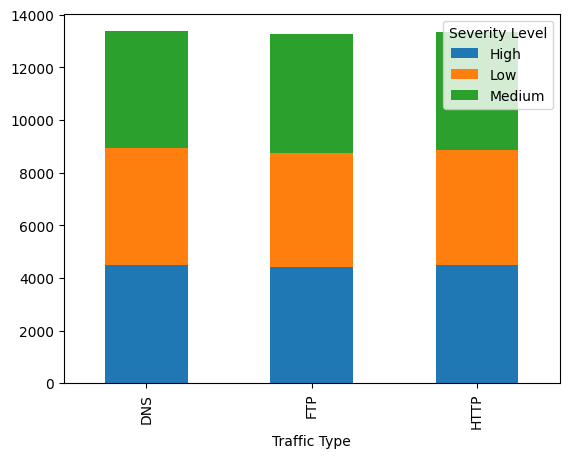

In [ ]:
###4 -¿Cuál es la distribución de los niveles de gravedad en diferentes tipos de tráfico?
dfp.groupby(['Traffic Type', 'Severity Level']).size().unstack().plot(kind='bar', stacked=True)

5. **¿Cuál es la información de usuario más común en el marco de datos?**

In [ ]:
###5 - ¿Cuál es la información de usuario más común en el marco de datos?

info_user_comun = dfp['User Information'].value_counts().head()
print(info_user_comun)

User Information
Ishaan Chaudhari    6
Heer Lad            6
Ishita Chaudry      5
Yasmin Ghose        5
Tara Madan          5
Name: count, dtype: int64


6. **¿Cuál es la puntuación de anomalía promedio para cada firma de ataque**

In [ ]:
###6 - ¿Cuál es la puntuación de anomalía promedio para cada firma de ataque

dfp.groupby('Attack Signature')['Anomaly Scores'].mean()

Attack Signature
Known Pattern A    50.145609
Known Pattern B    50.081092
Name: Anomaly Scores, dtype: float64

7. **¿Cuál es la acción más común tomada para cada tipo de ataque?**

In [ ]:
###7 - ¿Cuál es la acción más común tomada para cada tipo de ataque?

# Agrupar por tipo de ataque y acción tomada 
accion_df = dfp.groupby('Attack Type')['Action Taken'].value_counts().reset_index(name='count')

#Obtener la acción tomada más común para cada tipo de ataque  
accion_mas_comoun = accion_df.groupby('Attack Type')['Action Taken'].max()

#resultado
print(accion_mas_comoun)

Attack Type
DDoS         Logged
Intrusion    Logged
Malware      Logged
Name: Action Taken, dtype: object


8. **¿Cuál es la distribución de tipos de paquetes en diferentes segmentos de red?**

In [ ]:
### 8 - ¿Cuál es la distribución de tipos de paquetes en diferentes segmentos de red?

df_distribucion_paquetes_segred = dfp[['Network Segment', 'Packet Type']].groupby(['Network Segment', 'Packet Type']).size().reset_index(name='count')
print(df_distribucion_paquetes_segred)

  Network Segment Packet Type  count
0       Segment A     Control   6698
1       Segment A        Data   6575
2       Segment B     Control   6767
3       Segment B        Data   6552
4       Segment C     Control   6772
5       Segment C        Data   6636


9. **¿Cuál es la longitud promedio del paquete para cada dato de geo-localización?**

In [ ]:
###9 - ¿Cuál es la longitud promedio del paquete para cada dato de geo-localización?

dfp.groupby('Geo-location Data')['Packet Length'].mean()


Geo-location Data
Adoni, Andhra Pradesh          885.500000
Adoni, Arunachal Pradesh       389.000000
Adoni, Assam                   757.333333
Adoni, Bihar                   412.500000
Adoni, Chhattisgarh            946.875000
                                 ...     
Yamunanagar, Telangana         717.500000
Yamunanagar, Tripura           853.750000
Yamunanagar, Uttar Pradesh     590.571429
Yamunanagar, Uttarakhand      1304.000000
Yamunanagar, West Bengal       736.600000
Name: Packet Length, Length: 8723, dtype: float64

10. ** ¿Cuál es la fuente de registro de firewall más común en el marco de datos**

In [ ]:
### 10 - ¿Cuál es la fuente de registro de firewall más común en el marco de datos

In [ ]:
# Contar la frecuencia de cada fuente de registro y  Obtener la fuente de registro más común
numero_frecuencia_registro = dfp['Log Source'].value_counts()

# resultado
print('la fuente de registro de firewall más común es:', frecuencia_registro)

la fuente de registro de firewall más común es: Log Source
Firewall    20116
Server      19884
Name: count, dtype: int64


In [ ]:
dfp.head(1)

Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   

                                                                                                                                                             Payload Data  \
0  Qui natus odio asperiores nam. Optio nobis iusto accusamus ad perferendis esse at. Asperiores neque at ad.\nMaiores possimus ipsum saepe vitae. Ad possimus veritatis.   

  Malware Indicators  Anomaly Scores Alerts/Warnings Attack Type  \
0       IoC Detected           28.67             NaN     Malware   

  Attack Signature Action Taken Severity Level User Information  \
0  Known Pattern B       Logged            Low    Reyansh Dugal   

                                                Device Information  \
0  Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.2; Trident/5.0)   

  Network Segment Proxy Information Firewall Logs IDS/IPS Alerts Log Source  \
0       Segment A      150.9.97.135      Log Data            NaN     Server   

  Attack_Type Severity_Level Action_Taken Country_Origin City_Origin  
0     Malware            Low       Logged         Sikkim  Jamshedpur

In [3]:
# PROGRAMA GEOLOCALIZAR IPS DE UN DF


# Read in the dataframe
dfp = pd.read_csv('E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\cyber_attacks\cyber.csv')

# Crea una instancia del geocodificador (utilizando Nominatim en este caso).
geolocator = Nominatim(user_agent="my_geocoder")

# Crea una lista de las direcciones IP de origen a partir del marco de datos
source_ips = list(zip(dfp["Source IP Address"], dfp["Destination IP Address"]))

# Crea una lista vacía para almacenar las coordenadas de cada dirección IP de origen
coordinates = []

# Función de reintento para la geocodificación con un máximo de 3 intentos.
def geocode_with_retry(location):
    attempts = 0
    while attempts < 3:
        try:
            return geolocator.geocode(location)
        except (GeocoderTimedOut, TimeoutError) as e:
            print(f"Error geocoding {location}: {e}")
            attempts += 1
            time.sleep(1)  #Agrega una breve pausa antes de volver a intentarlo
    return None

# Itera a través de la lista de direcciones IP de origen y obtén las coordenadas para cada una.
for ip in source_ips:
    try:
        location = geolocator.geocode(ip, timeout=10)  # Ajusta el tiempo de espera según tus necesidades)
        if location:
            coordinates.append((location.longitude, location.latitude))
        else:
            coordinates.append((None, None))# si la ubicacion no se encuentra
    except TimeoutError:
        # Manejar excepciones, por ejemplo, añadir un retraso y reintento
        time.sleep(1)  # Espera 1 segundo antes de volver a intentar
        try:
            location = geolocator.geocode(ip, timeout=10)
            if location:
                coordinates.append((location.longitude, location.latitude))
            else:
                coordinates.append((None, None))
        except TimeoutError:
            coordinates.append((None, None))  # Si aún hay un error, añade None

# Filtra las coordenadas que no son None
filtered_coordinates = [xy for xy in coordinates if xy[0] is not None and xy[1] is not None]

# Crea un GeoDataFrame a partir de la lista de coordenadas.
geometry = [Point(xy) for xy in coordinates]
gdf = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")

# Representa el GeoDataFrame en un mapa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray')
gdf.plot(ax=ax, marker='o', color='red', markersize=50, alpha=0.7)
plt.title